In [1]:
import pandas as pd
from pathlib import Path
from path import Path
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# What type of data is available? List DF data types
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")
    
    

Column Rank has 0 null values
Column Name has 0 null values
Column Platform has 0 null values
Column Year has 271 null values
Column Genre has 0 null values
Column Publisher has 58 null values
Column NA_Sales has 0 null values
Column EU_Sales has 0 null values
Column JP_Sales has 0 null values
Column Other_Sales has 0 null values
Column Global_Sales has 0 null values


In [5]:
# Drop null rows
#df.dropna()

In [6]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
df.drop(['Year', 'Publisher', 'Other_Sales', 'Global_Sales'], axis=1)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# List of columns
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
# List of names in Genre column
df['Genre'].tolist()

['Sports',
 'Platform',
 'Racing',
 'Sports',
 'Role-Playing',
 'Puzzle',
 'Platform',
 'Misc',
 'Platform',
 'Shooter',
 'Simulation',
 'Racing',
 'Role-Playing',
 'Sports',
 'Sports',
 'Misc',
 'Action',
 'Action',
 'Platform',
 'Misc',
 'Role-Playing',
 'Platform',
 'Platform',
 'Action',
 'Action',
 'Role-Playing',
 'Role-Playing',
 'Puzzle',
 'Racing',
 'Shooter',
 'Role-Playing',
 'Shooter',
 'Role-Playing',
 'Shooter',
 'Shooter',
 'Shooter',
 'Shooter',
 'Shooter',
 'Action',
 'Fighting',
 'Shooter',
 'Simulation',
 'Racing',
 'Shooter',
 'Action',
 'Action',
 'Platform',
 'Racing',
 'Platform',
 'Role-Playing',
 'Adventure',
 'Action',
 'Racing',
 'Platform',
 'Racing',
 'Shooter',
 'Action',
 'Platform',
 'Role-Playing',
 'Platform',
 'Misc',
 'Shooter',
 'Shooter',
 'Racing',
 'Platform',
 'Shooter',
 'Role-Playing',
 'Shooter',
 'Misc',
 'Racing',
 'Shooter',
 'Platform',
 'Misc',
 'Simulation',
 'Misc',
 'Role-Playing',
 'Racing',
 'Sports',
 'Misc',
 'Shooter',
 'Misc',
 

In [10]:
# List of 'Genre' unique values
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

# Creating Visuals with New CSV

In [11]:
file_path = 'Resources/vgsales_reduced_NA_and_EU.csv'
df1 = pd.read_csv(file_path)
df1.head()

,Rank,Platform,Genre,NA_Sales,EU_Sales,JP_Sales
0,1,Wii,Sports,41.49,29.02,3.77
1,2,NES,Platform,29.08,3.58,6.81
2,3,Wii,Racing,15.85,12.88,3.79
3,4,Wii,Sports,15.75,11.01,3.28
4,5,GB,Role-Playing,11.27,8.89,10.22


In [12]:
# Sales for all Locations
jp = df1['JP_Sales'].sum()
eu = df1['EU_Sales'].sum()
na = df1['NA_Sales'].sum()

print(f'Japan Sales : {jp}')
print(f'Europe Sales : {eu}')
print(f'North America Sales : {na}')

Japan Sales : 1291.0200000000002
Europe Sales : 2434.1299999999997
North America Sales : 4392.950000000001


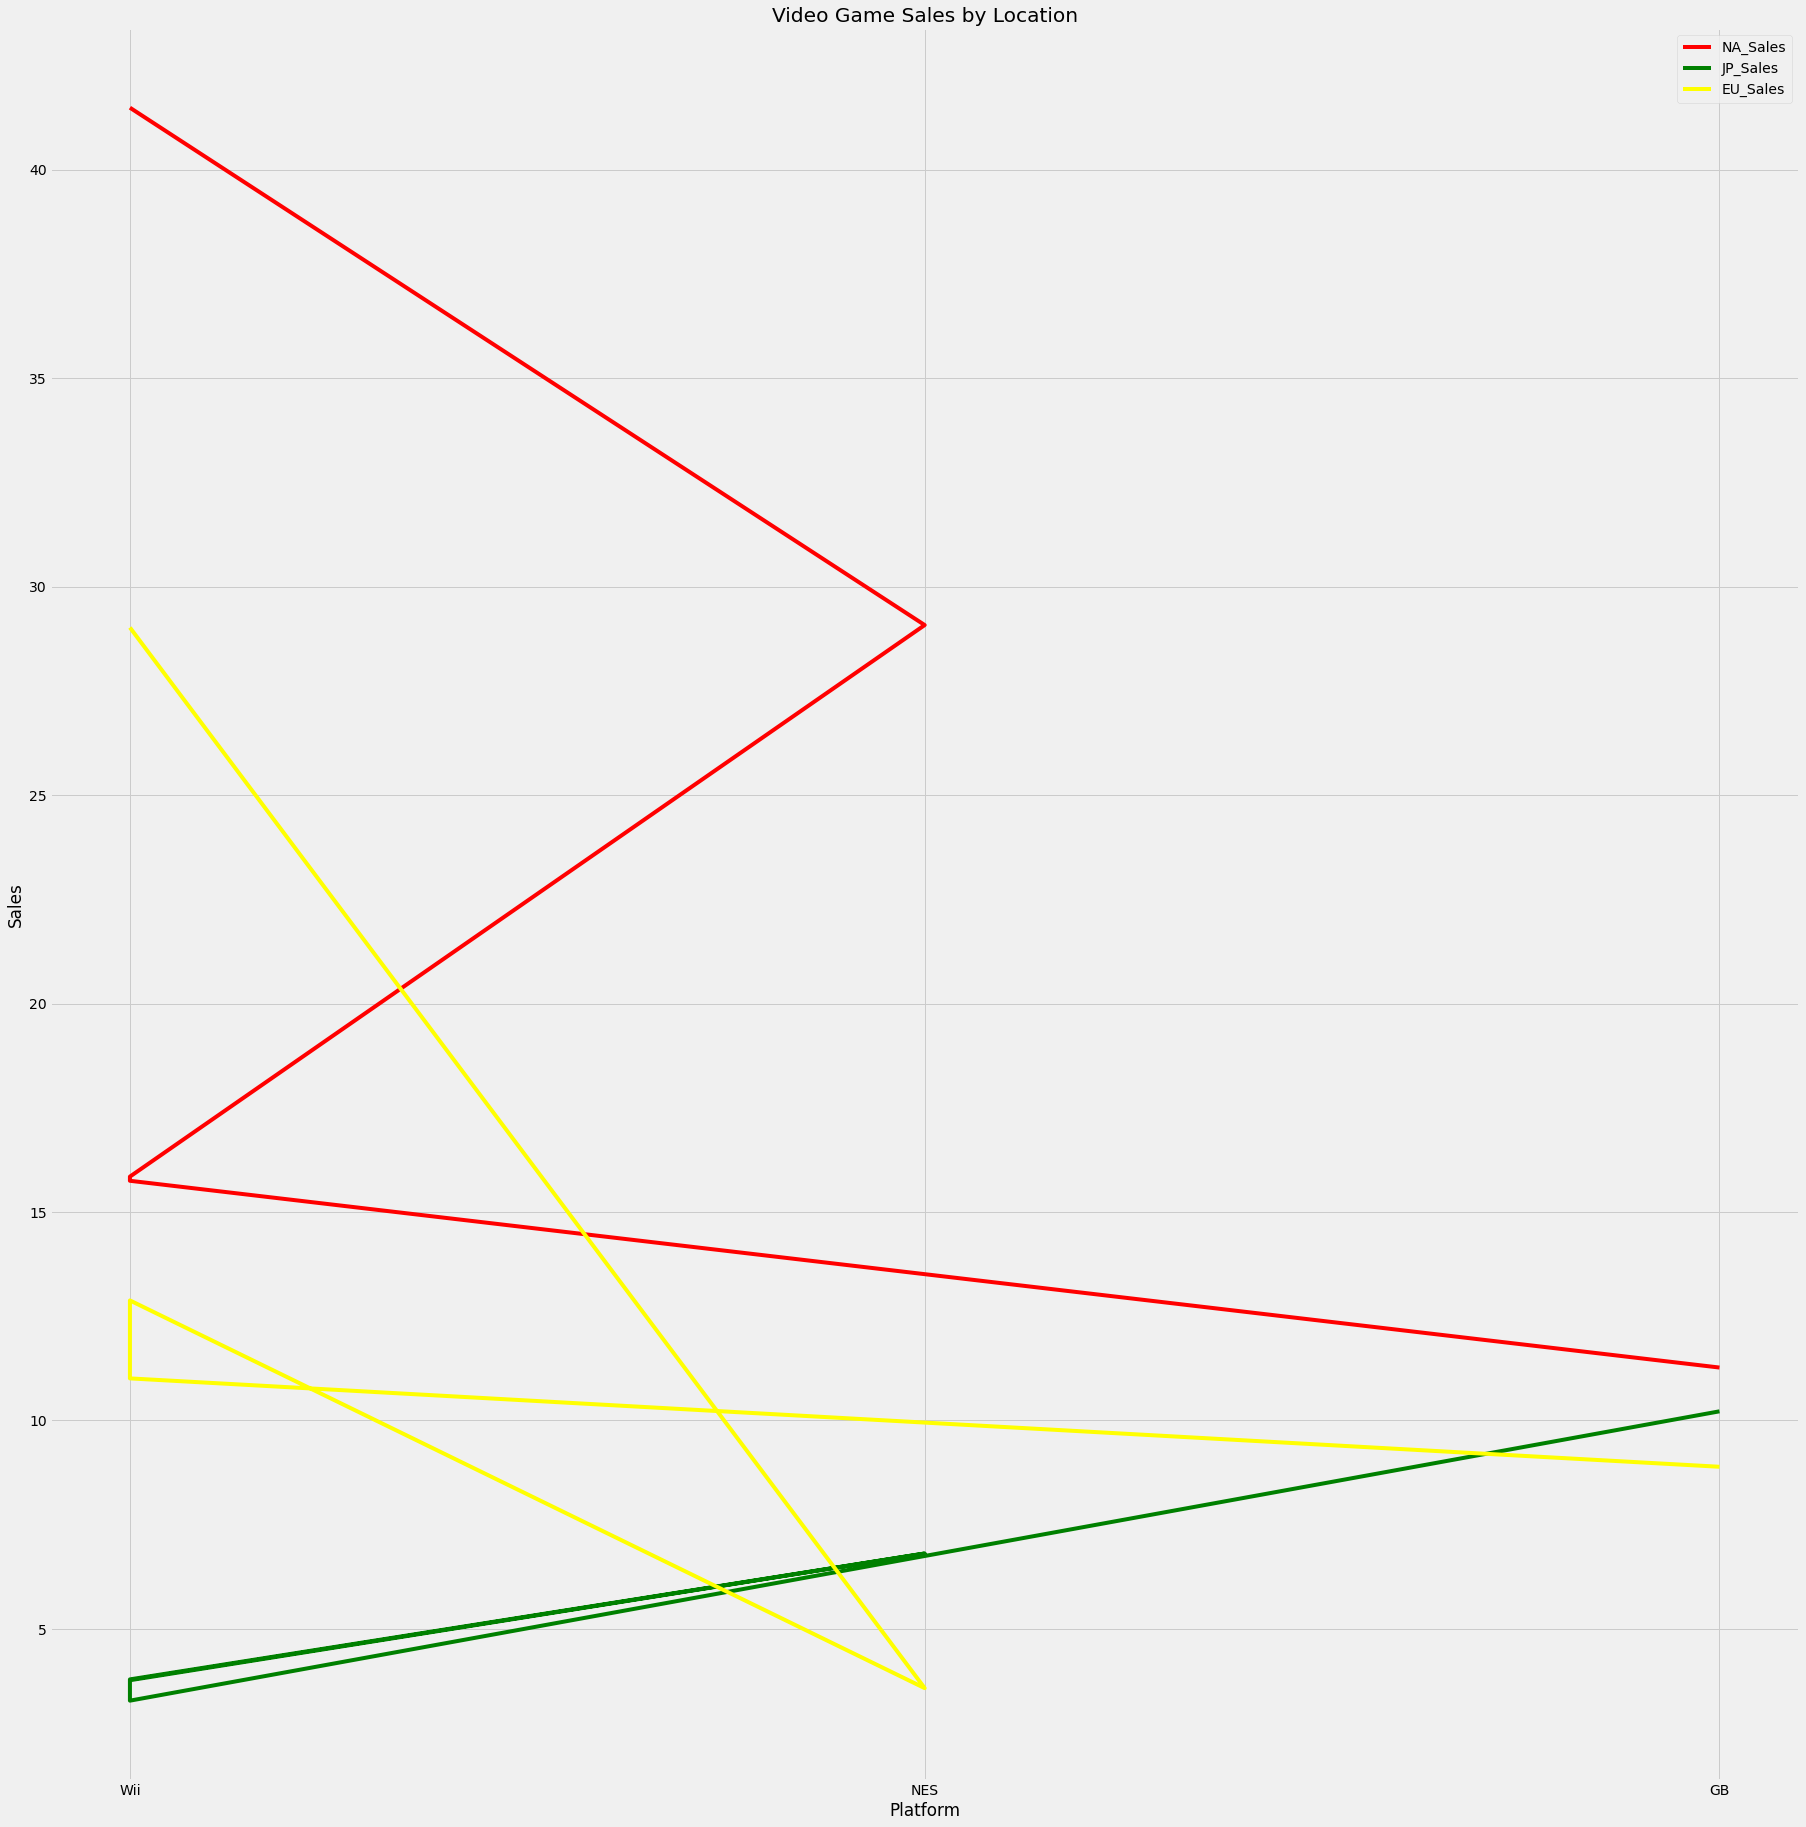

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,25))
plt.plot(df1['Platform'].head(), df1['NA_Sales'].head(), color='red', label='NA_Sales')
plt.plot(df1['Platform'].head(), df1['JP_Sales'].head(), color ='green', label='JP_Sales')
plt.plot(df1['Platform'].head(), df1['EU_Sales'].head(), color='yellow', label='EU_Sales')
plt.tight_layout()
plt.legend()
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Video Game Sales by Location')
plt.show()

In [14]:
df1['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [15]:
df_labels = df1['Genre'].value_counts()
df_labels

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [16]:
df_labels.keys().tolist()

['Action',
 'Sports',
 'Misc',
 'Role-Playing',
 'Shooter',
 'Adventure',
 'Racing',
 'Platform',
 'Simulation',
 'Fighting',
 'Strategy',
 'Puzzle']

In [32]:
df1['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [50]:
df_labels2 = df1['Platform'].value_counts()

In [49]:
df_labels2.keys().tolist()

['DS',
 'PS2',
 'PS3',
 'Wii',
 'X360',
 'PSP',
 'PS',
 'PC',
 'XB',
 'GBA',
 'GC',
 '3DS',
 'PSV',
 'PS4',
 'N64',
 'SNES',
 'XOne',
 'SAT',
 'WiiU',
 '2600',
 'NES',
 'GB',
 'DC',
 'GEN',
 'NG',
 'SCD',
 'WS',
 '3DO',
 'TG16',
 'PCFX',
 'GG']

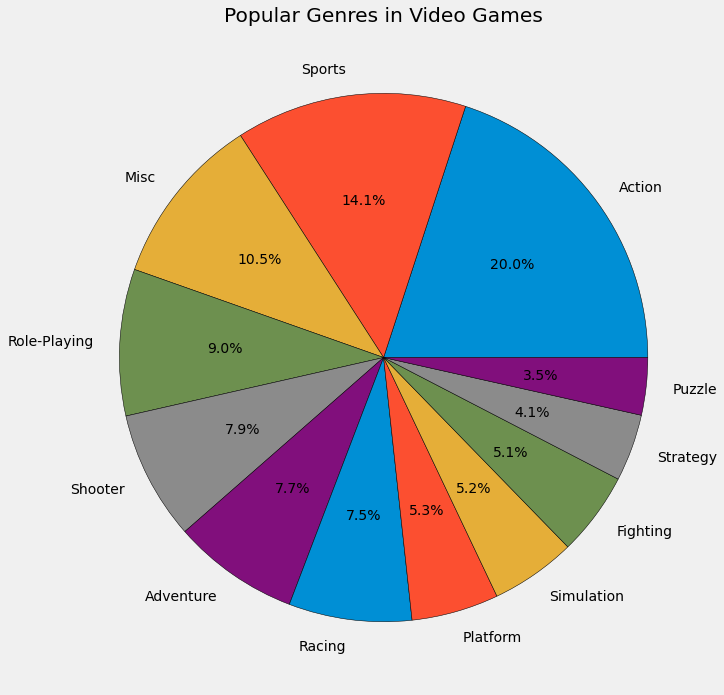

In [47]:
# Creating pie chart (Genres)
labels = df_labels.keys().tolist()
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,10))
plt.pie(list(df1['Genre'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Genres in Video Games')
plt.tight_layout()
plt.show()

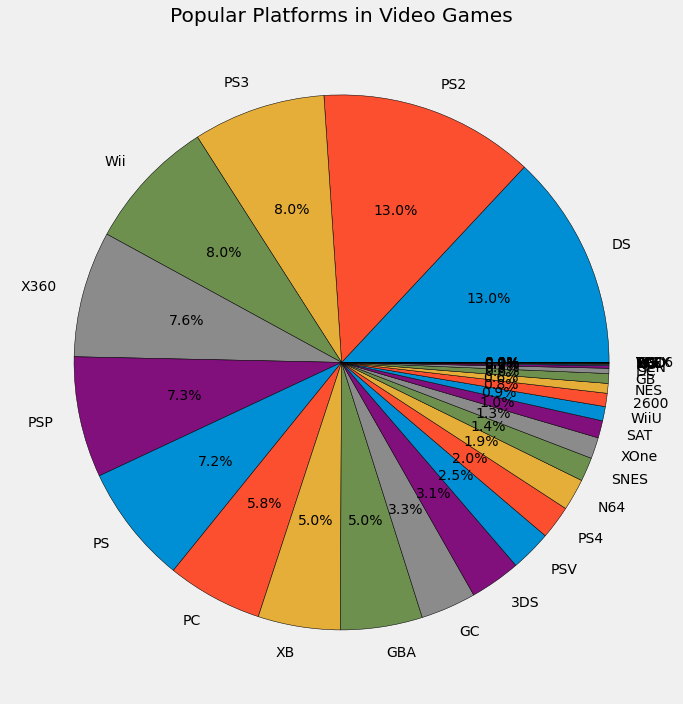

In [46]:
# Creating pie chart (Platform)
labels = df_labels2.keys().tolist()
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,10))
plt.pie(list(df1['Platform'].value_counts()), autopct='%1.1f%%', labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Popular Platforms in Video Games')
plt.tight_layout()
plt.show()